<a href="https://colab.research.google.com/github/Jkia65/Assignment-3-Python-Refresher/blob/main/Assignment_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 12

Step 1: Data Preparation

Training images: (50000, 32, 32, 3)
Training labels: (50000, 1)
Test images: (10000, 32, 32, 3)
Test labels: (10000, 1)


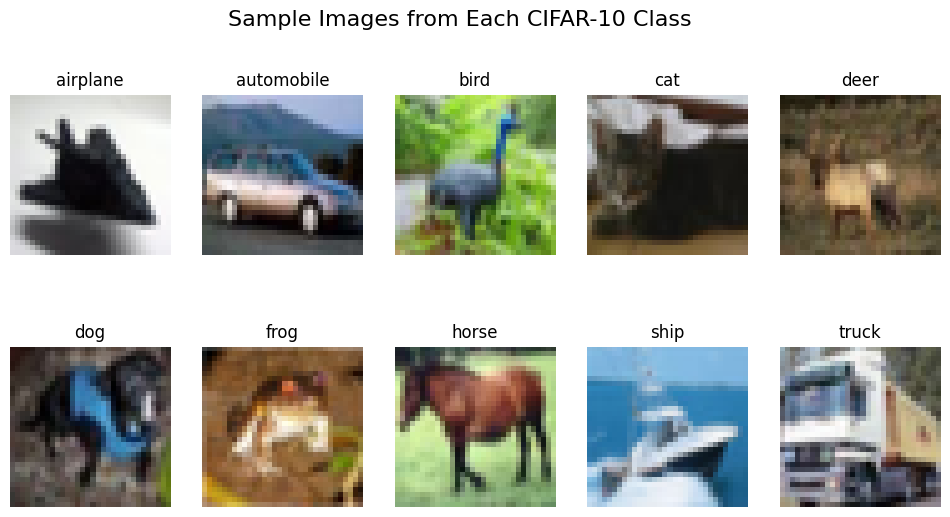

In [11]:
# Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




# Load CIFAR-10 Dataset

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Check dataset shapes
print("Training images:", X_train.shape)
print("Training labels:", y_train.shape)
print("Test images:", X_test.shape)
print("Test labels:", y_test.shape)


# Convert Labels to One-Hot Encoding
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Class Names
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']


# Visualize Sample Images from Each Class
plt.figure(figsize=(12,6))
for i, class_name in enumerate(class_names):
    # pick the first image from each class
    idx = np.where(y_train.flatten() == i)[0][0]
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[idx])
    plt.title(class_name)
    plt.axis('off')
plt.suptitle("Sample Images from Each CIFAR-10 Class", fontsize=16)
plt.show()

# Step 2: Image Processing

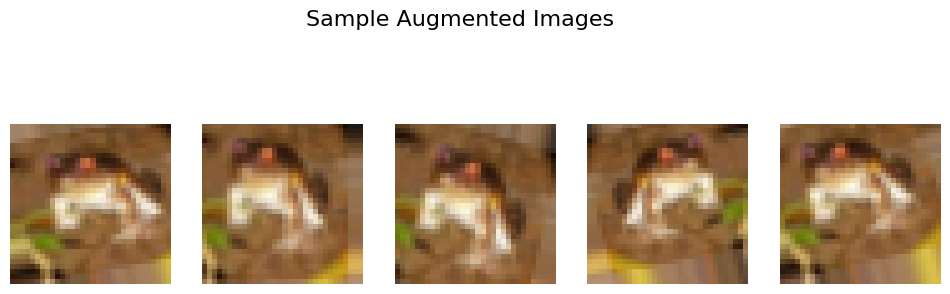

In [8]:
# Normalize Pixel Values (0-1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,      # rotate images by ±15 degrees
    width_shift_range=0.1,  # horizontal shift
    height_shift_range=0.1, # vertical shift
    horizontal_flip=True,   # randomly flip images horizontally
    zoom_range=0.1,         # random zoom
    fill_mode='nearest',    # filling strategy for empty pixels
    validation_split=0.2    # optional validation split if using flow()
)

# Fit the generator to training data
datagen.fit(X_train)

# Display 5 augmented images of first sample
sample_img = X_train[0].reshape(1,32,32,3)
aug_iter = datagen.flow(sample_img, batch_size=1)

plt.figure(figsize=(12,4))
for i in range(5):
    batch = next(aug_iter)
    image_aug = batch[0]
    plt.subplot(1,5,i+1)
    plt.imshow(image_aug)
    plt.axis('off')
plt.suptitle("Sample Augmented Images", fontsize=16)
plt.show()

Step 3: NEURAL NETWORK IMPLEMENTATION

In [6]:

# One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat  = to_categorical(y_test, num_classes=10)

# Model Architecture
model = Sequential([
    Flatten(input_shape=(32,32,3)),         # Flatten image to 1D
    Dense(256, activation='relu'),          # Hidden layer 1
    Dropout(0.3),                           # Dropout for regularization
    Dense(128, activation='relu'),          # Hidden layer 2 (optional)
    Dropout(0.2),
    Dense(10, activation='softmax')         # Output layer for 10 classes
])

# Model Compilation
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model Summary
model.summary()

# Model Training
history = model.fit(
    X_train, y_train_cat,
    validation_split=0.2,   # 20% of training data for validation
    epochs=15,
    batch_size=64,
    verbose=2
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 820,874 (3.13 MB)

 Trainable params: 820,874 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
625/625 - 11s - 17ms/step - accuracy: 0.0981 - loss: 9.3842 - val_accuracy: 0.1025 - val_loss: 2.3032
Epoch 2/15
625/625 - 9s - 14ms/step - accuracy: 0.1003 - loss: 2.3041 - val_accuracy: 0.0952 - val_loss: 2.3031
Epoch 3/15
625/625 - 10s - 15ms/step - accuracy: 0.0990 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3030
Epoch 4/15
625/625 - 11s - 17ms/step - accuracy: 0.1006 - loss: 2.3027 - val_accuracy: 0.1003 - val_loss: 2.3030
Epoch 5/15
625/625 - 11s - 17ms/step - accuracy: 0.0971 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3031
Epoch 6/15
625/625 - 10s - 16ms/step - accuracy: 0.1011 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3032
Epoch 7/15
625/625 - 10s - 16ms/step - accuracy: 0.0992 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3031
Epoch 8/15
625/625 - 14s - 23ms/step - accuracy: 0.0984 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3031
Epoch 9/15
625/625 - 14s - 23ms/step - accuracy: 0.1000 - loss: 2.3027 - val_accuracy: 0.0976 - v

Step 4: Model Evaluation

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test Accuracy: 0.1001

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       1.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.10      1.00      0.18      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.11      0.10      0.02     10000
weighted avg       0.11      0.10      0.02     10000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


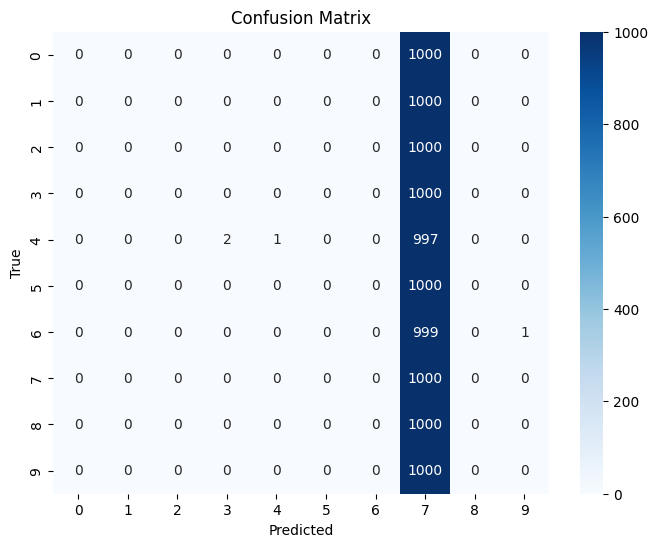

In [12]:
# Predict class probabilities
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Step 5: Application Demonstration

In [13]:
# The model can classify images in real-time for fashion retail, media tagging, or surveillance.

# Consider scalability, fast inference, integration via API, and periodic retraining for accuracy.